In [100]:
import cairo
import numpy as np

In [178]:
surface = cairo.SVGSurface("example.svg", 300, 200)
context = cairo.Context(surface)
context.scale(400, 200)

# sequence line across figure
x, x2 = 0.1, 0.9
y, y2 = 0.5, 0.5
context.move_to(x, y)
context.set_line_width(0.01)
context.line_to(x2, y2)
context.stroke()


# exons
coordinates = '23:38'

context.rectangle(23/100,(0.5-0.02),38/100,0.04)
context.stroke()


surface.finish()


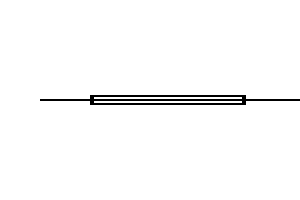

In [179]:
from IPython.display import SVG, display
SVG('example.svg')

In [86]:
## Object oriented play time, let's implement this for motif_mark

class to_do:
    '''To do list'''
    def __init__(self, store, my_list):
        self.store = 'TJS'
        self.list = my_list
        
    def add_item_to_list(self,item):
        self.list.append(item)

my_list = ['apples', 'cookies', 'milk']

td = to_do('TJS', my_list)

print(td.list)

td.add_item_to_list('milk')

print(td.list)


['apples', 'cookies', 'milk']
['apples', 'cookies', 'milk', 'milk']


In [75]:
st = "asdfa;lsdf;lkajs;dlfjkhlkjCGCChsdfoiuwerASygcyDFBBTGCATGCBTugcuTGGTGAGGTTAAAGTGCTGTGCGTasdfhlkwerltgcatgasdflksdf"

In [242]:
# def find_exon(string):
#     coordinates = []
#     for i, char in enumerate(st):
#         if char.isupper():
#             coordinates.append(i)
#     return (min(coordinates),max(coordinates))

# find_exon(st)

# motif list
motif_list
def motif_patterns(motif_list):
    'returns list of regex searchs for any motif of IUPAC nucleotide codes'
    motif_match_list = []
    
    IUPAC_dict = {'y':'(C|T|U)',
                  'r':'(A|G)',
                  's':'(C|G)',
                  'w':'(A|T|U)',
                  'k':'(G|T|U)',
                  'm':'(C|A)',
                  'b':'(C|G|T|U)',
                  'd':'(A|G|T|U)',
                  'v':'(A|C|G)',
                  'h':'(A|C|T|U)'
                 }
    
    for tif in motif_list:
        for key in IUPAC_dict:
            m = re.finditer(r'(?i)'+key, tif)
            for i in m:
                tif = tif.replace(i.group(), IUPAC_dict[key])
    
        motif_match_list.append(tif)
        
    return motif_match_list
        

motif_patterns(motif_list)

           

import re

def motif_coords(motif):
    'returns string coordinates of motif match (case insensitive)'
    motif_coords_list = []
    m = re.finditer(r'(?i)'+motif, st)
    for i in m:
        motif_coords_list.append(str(i.start())+':'+str(i.end()))
        
    return motif_coords_list

motif_coords('(C|T|U)gc(C|T|U)')

['26:30', '59:63', '77:81']


In [155]:
def get_motif_list(motifile):
    '''return list of motifs from motif file'''
    with open(motifile, 'r') as mh:

        # list to hold motifs of interest
        motifs = []

        # loop over each line storing each motif in list
        for line in mh: 
            motifs.append(line.strip())

        return motifs
    
motif_list = get_motif_list('motifs.txt')

In [97]:
def get_seq_regions(fastafile):
    with open(fastafile, 'r') as fh:
        exon_dict = {}
        for line in fh:
            line = line.strip()
            if line[0] == '>':
                header = line
                seq = '' 
            elif line[0] != '>':  
                seq += line
                exon_dict[header] = seq

{'>ADD3 chr10:111891895-111892326': 'aatgtataattatggatatatgggataactgttagcatgctcagctcactgctgaagaatttatcatctctttgtatacaggcatttgatgtatgcactaacctccctaaaatcatatgctgctttgttttgttttgcatggcttttaactaaactcttatccaacagATGCTGAGCAGGAATTACTCTCAGATGACGCTTCATCTGTTTCACAAATTCAGTCTCAAACTCAGTCACCGCAAAATGTCCCTGAAAAATTAGAAGgtactcaatgtaatttcccacatagcattcactgagttagtcttgagtctgtccctctgtgttttgttttcacgtgaggaagttgaatacctcatcacagtaagttttccatattttacttatatctcccaataattacatattttatatcattaaaaatggggcgct',
 '>INSR chr19:7149896-7151209 (reverse complement)': 'aaaattctgccagacttggagaagtggctgagtcagttgtgatgtccacatgtagtcacgtttgacatcccagggccacctcagcaggccgtctctggggagaattttctctgatttcttccccttcccttgctggacccctgcacctgctggggaagatgtagctcactccgtctagcaagtgatgggagcgagtggtccagggtcaaagccagggtgcccttactcggacacatgtggcctccaagtgtcagagcccagtggtctgtctaatgaagttccctctgtcctcaaaggcgttggttttgtttccacagAAAAACCTCTTCAGGCACTGGTGCCGAGGACCCTAGgtatgactcacctgtgcgacccctggtgcctgctccgcgcagggccggcggcgtgccaggcagatgcctcggagaacccaggggtttctgtggctttttgcatgcggcgggcagctgtgct

In [4]:
li = ['a','b','r','t']
li2 = ''.join(li)
print(li2)

abrt
